In [2]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('16per_data/16P.csv', sep=",", encoding='cp1252', index_col=0)
data

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
Response Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,-1,0,-3,-2,2,1,0,1,0,...,0,2,0,1,0,0,2,3,3,INFJ
59995,0,0,-2,1,3,0,-3,0,2,0,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,0,0,1,0,-2,-2,0,0,-1,0,...,-1,2,0,-3,0,1,-1,0,-1,ISTP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59999 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   You regularly make new friends.                                                                                       59999 non-null  int64 
 1   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 2   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 3   You often make a backup plan for a backup plan.                                                                       59999 non-null  int64 
 4   You usuall

In [5]:
for col in data:
    print(data[col].value_counts())

 0    51981
-1     4032
 1     3984
-2        2
Name: You regularly make new friends., dtype: int64
 0    52021
-1     4003
 1     3975
Name: You spend a lot of your free time exploring various random topics that pique your interest, dtype: int64
 0    13806
-1    12263
 1    11857
-2     8290
 2     8273
 3     2831
-3     2679
Name: Seeing other people cry can easily make you feel like you want to cry too, dtype: int64
-1    13892
 0    13804
 1    10416
-2     9933
 2     6597
-3     3316
 3     2041
Name: You often make a backup plan for a backup plan., dtype: int64
 0    13780
-1    13386
 1    11057
-2     9530
 2     7078
-3     3135
 3     2033
Name: You usually stay calm, even under a lot of pressure, dtype: int64
 0    13791
 1    12234
-1    12117
-2     8231
 2     8206
 3     2752
-3     2668
Name: At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know, dtype: int64
-1    15626
 0    13818
-2    11888
 1     8572
 

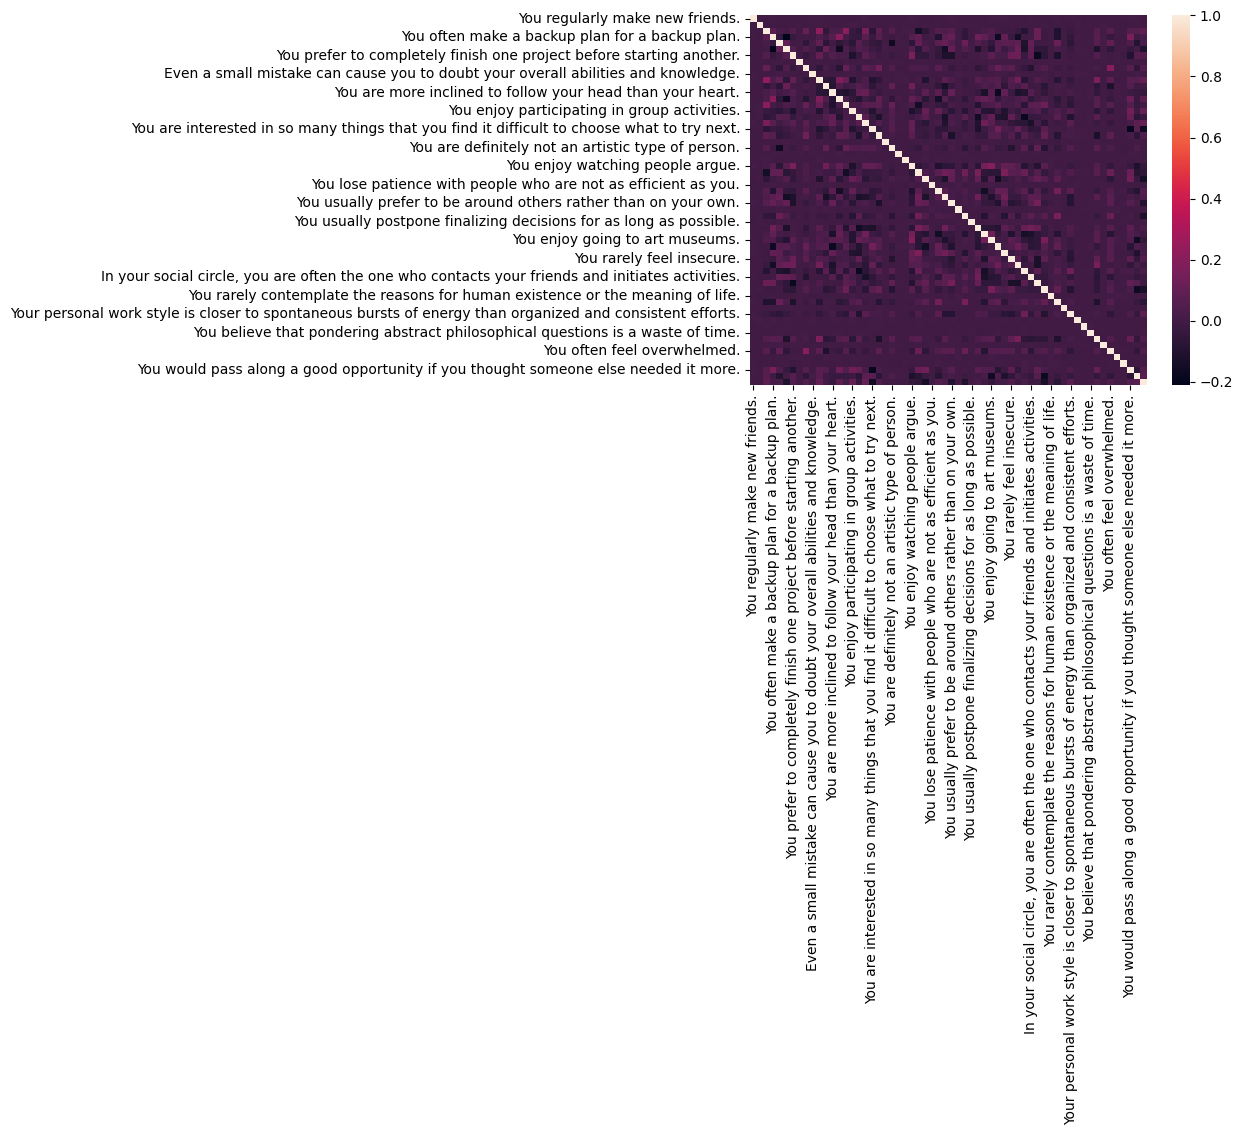

In [6]:
sn.heatmap(data.corr())
plt.show()

In [9]:
col_dict={}
i=1
for col in data.columns:
    col_dict['Q'+str(i)]=col
    i+=1
col_dict

{'Q1': 'You regularly make new friends.',
 'Q2': 'You spend a lot of your free time exploring various random topics that pique your interest',
 'Q3': 'Seeing other people cry can easily make you feel like you want to cry too',
 'Q4': 'You often make a backup plan for a backup plan.',
 'Q5': 'You usually stay calm, even under a lot of pressure',
 'Q6': 'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
 'Q7': 'You prefer to completely finish one project before starting another.',
 'Q8': 'You are very sentimental.',
 'Q9': 'You like to use organizing tools like schedules and lists.',
 'Q10': 'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
 'Q11': 'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
 'Q12': 'You are not too interested in discussing various interpretations and analyses of creative works.',
 'Q13': 'You are more inclined t

In [10]:
rename={}
i=1
for col in data.columns:
    rename[col]='Q'+str(i)
    i+=1
rename

{'You regularly make new friends.': 'Q1',
 'You spend a lot of your free time exploring various random topics that pique your interest': 'Q2',
 'Seeing other people cry can easily make you feel like you want to cry too': 'Q3',
 'You often make a backup plan for a backup plan.': 'Q4',
 'You usually stay calm, even under a lot of pressure': 'Q5',
 'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know': 'Q6',
 'You prefer to completely finish one project before starting another.': 'Q7',
 'You are very sentimental.': 'Q8',
 'You like to use organizing tools like schedules and lists.': 'Q9',
 'Even a small mistake can cause you to doubt your overall abilities and knowledge.': 'Q10',
 'You feel comfortable just walking up to someone you find interesting and striking up a conversation.': 'Q11',
 'You are not too interested in discussing various interpretations and analyses of creative works.': 'Q12',
 'You are more inclined to follo

In [13]:
data.rename(columns = rename, inplace = True)
data.rename(columns = {'Q61':'Personality'}, inplace = True)
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
Response Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,-1,0,-3,-2,2,1,0,1,0,...,0,2,0,1,0,0,2,3,3,INFJ
59995,0,0,-2,1,3,0,-3,0,2,0,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,0,0,1,0,-2,-2,0,0,-1,0,...,-1,2,0,-3,0,1,-1,0,-1,ISTP


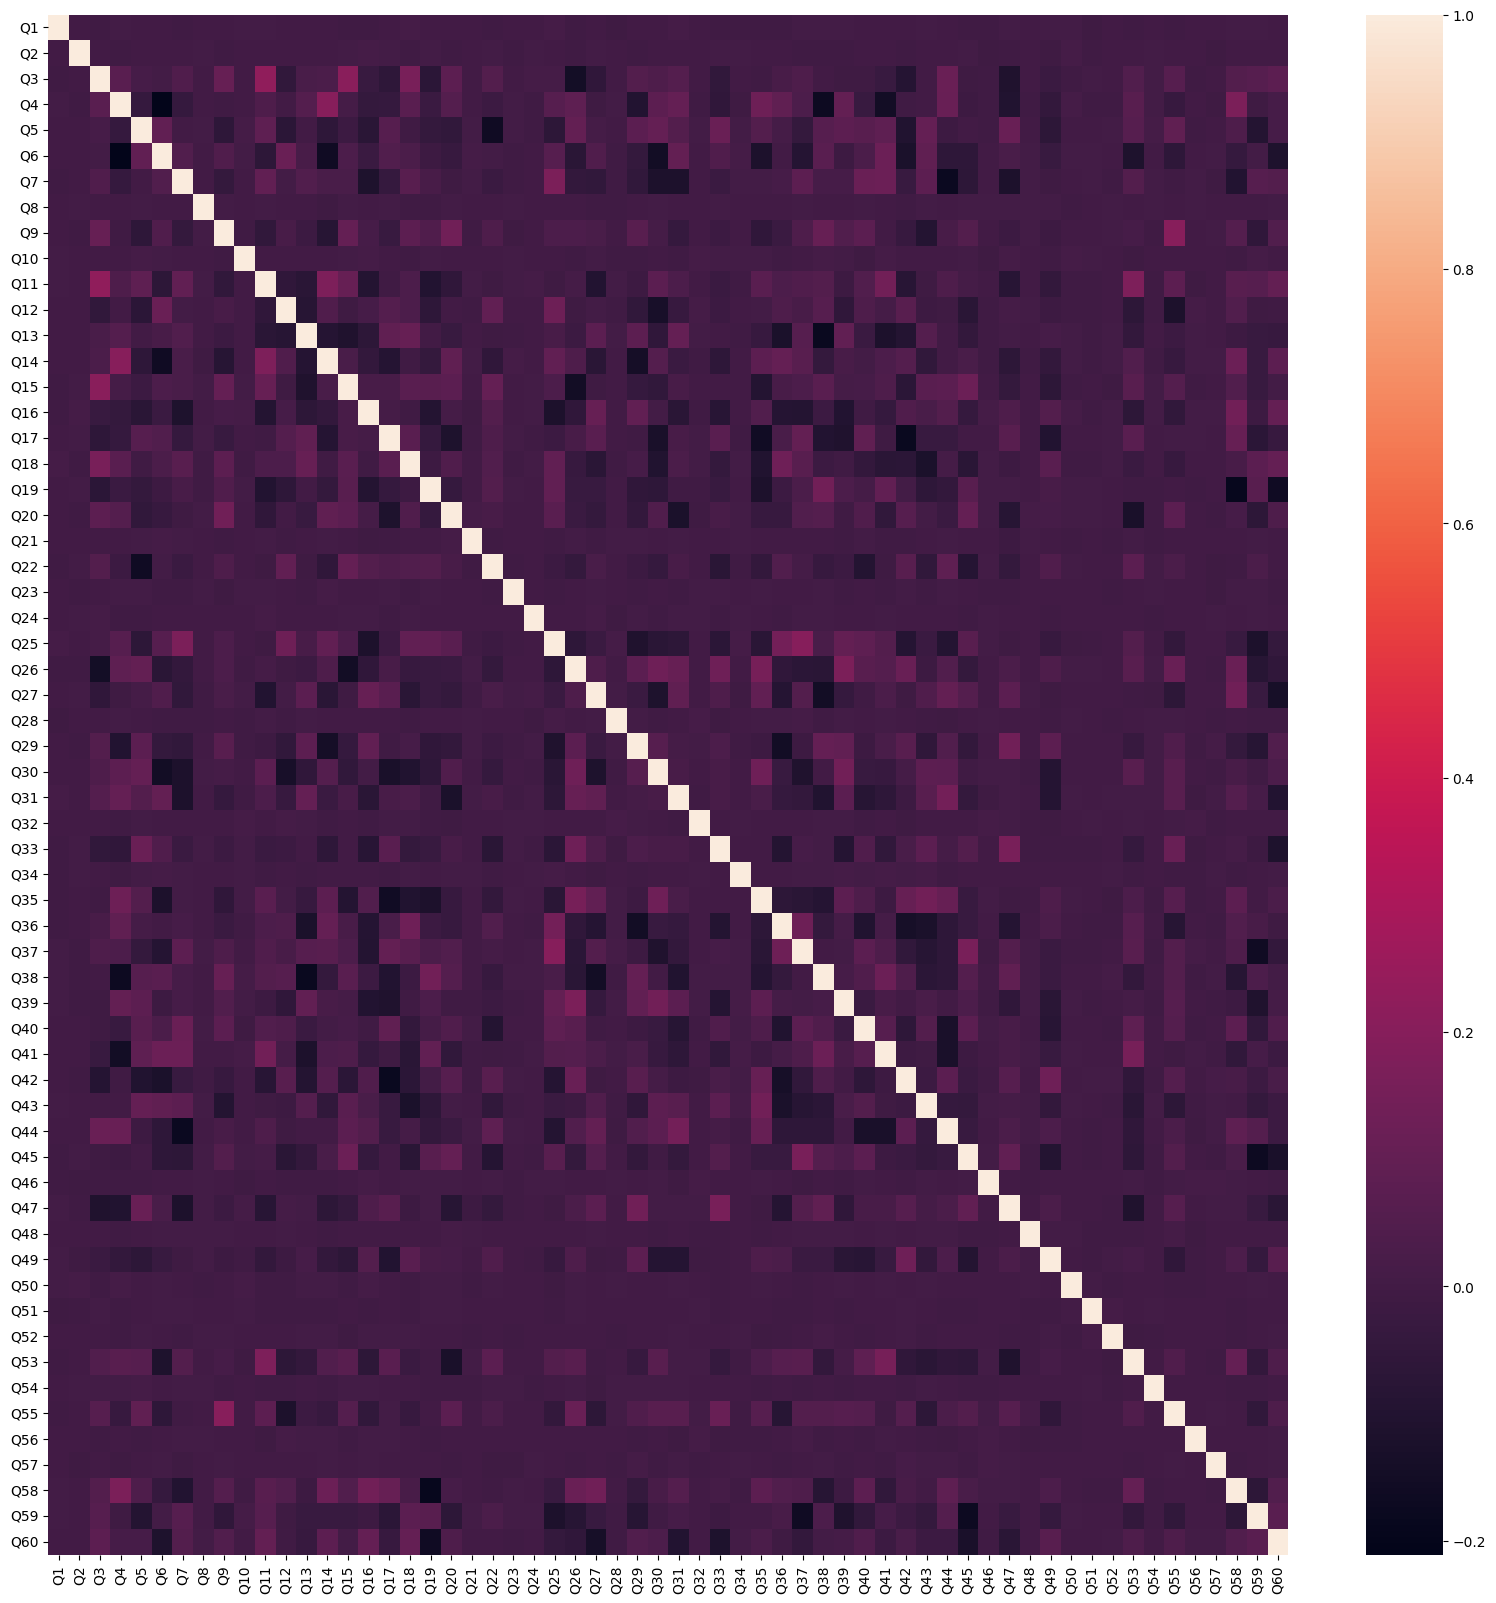

In [17]:
plt.figure(figsize=(20,20))
sn.heatmap(data.corr())
plt.show()

In [18]:
data.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
Q1,1.000000,0.001872,-0.003700,0.004305,-0.002460,0.000428,-0.002956,0.000989,-0.000872,0.006430,...,-0.010965,0.001737,-0.003612,-0.002004,-0.003878,-0.001628,-0.001109,0.002872,0.002963,0.001511
Q2,0.001872,1.000000,0.001856,-0.003393,-0.001457,0.001447,-0.001180,0.004975,-0.003611,0.001606,...,-0.003872,-0.001119,-0.000921,0.002112,-0.002113,-0.001255,-0.009923,-0.000678,-0.000958,-0.000702
Q3,-0.003700,0.001856,1.000000,0.071982,0.014353,0.003865,0.042517,0.000060,0.106469,-0.001870,...,0.003463,-0.000861,0.048100,0.002681,0.062870,-0.004040,-0.000682,0.051303,0.060876,0.080745
Q4,0.004305,-0.003393,0.071982,1.000000,-0.040502,-0.210979,-0.037477,-0.000051,-0.004150,-0.002443,...,-0.004243,-0.003898,0.065071,0.003745,-0.035781,0.000899,-0.008573,0.171982,-0.009186,0.014211
Q5,-0.002460,-0.001457,0.014353,-0.040502,1.000000,0.094573,-0.002772,0.002089,-0.059982,0.007197,...,-0.001274,0.002908,0.061607,0.007085,0.087879,-0.006619,-0.000391,0.035731,-0.094340,0.012393
Q6,0.000428,0.001447,0.003865,-0.210979,0.094573,1.000000,0.046232,-0.001635,0.043979,0.002536,...,0.004274,-0.000597,-0.111823,0.001425,-0.063295,-0.001257,0.005970,-0.040249,0.006118,-0.113607
Q7,-0.002956,-0.001180,0.042517,-0.037477,-0.002772,0.046232,1.000000,-0.000588,-0.042213,-0.000624,...,0.003383,-0.007437,0.049433,0.002989,-0.006416,0.002679,-0.009071,-0.098562,0.059372,0.049881
Q8,0.000989,0.004975,0.000060,-0.000051,0.002089,-0.001635,-0.000588,1.000000,0.006203,-0.001742,...,0.000005,0.003456,0.000768,0.006304,0.000755,0.002487,-0.001106,-0.002331,0.001044,0.002321
Q9,-0.000872,-0.003611,0.106469,-0.004150,-0.059982,0.043979,-0.042213,0.006203,1.000000,-0.006139,...,0.000671,0.004335,0.014399,-0.006700,0.203847,-0.001693,0.003765,0.055080,-0.059337,0.048672
Q10,0.006430,0.001606,-0.001870,-0.002443,0.007197,0.002536,-0.000624,-0.001742,-0.006139,1.000000,...,0.003258,-0.001601,-0.010409,-0.002652,0.000709,-0.002626,-0.001215,-0.002974,0.008583,-0.001021


In [23]:
data.corr()[data.corr()>0.5].sum()

Q1     1.0
Q2     1.0
Q3     1.0
Q4     1.0
Q5     1.0
Q6     1.0
Q7     1.0
Q8     1.0
Q9     1.0
Q10    1.0
Q11    1.0
Q12    1.0
Q13    1.0
Q14    1.0
Q15    1.0
Q16    1.0
Q17    1.0
Q18    1.0
Q19    1.0
Q20    1.0
Q21    1.0
Q22    1.0
Q23    1.0
Q24    1.0
Q25    1.0
Q26    1.0
Q27    1.0
Q28    1.0
Q29    1.0
Q30    1.0
Q31    1.0
Q32    1.0
Q33    1.0
Q34    1.0
Q35    1.0
Q36    1.0
Q37    1.0
Q38    1.0
Q39    1.0
Q40    1.0
Q41    1.0
Q42    1.0
Q43    1.0
Q44    1.0
Q45    1.0
Q46    1.0
Q47    1.0
Q48    1.0
Q49    1.0
Q50    1.0
Q51    1.0
Q52    1.0
Q53    1.0
Q54    1.0
Q55    1.0
Q56    1.0
Q57    1.0
Q58    1.0
Q59    1.0
Q60    1.0
dtype: float64

In [24]:
data.isna().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
              ..
Q57            0
Q58            0
Q59            0
Q60            0
Personality    0
Length: 61, dtype: int64

In [27]:
data=data.drop_duplicates()

In [192]:
from sklearn_som.som import SOM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [193]:
X = data.drop(['Personality'], axis=1).copy()
Y = data['Personality'].copy()
print(X)
print(Y)

             Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q51  Q52  Q53  Q54  \
Response Id                                           ...                       
0             0   0   0   0   0   1   1   0   0    0  ...    0    0    0    0   
1             0   0  -2  -3  -1   2  -2   0   3    0  ...    0    0   -2    0   
2             0   0   2   0  -1   2   0   0   1    0  ...    0    0    2    0   
3             0  -1   3  -1   0   0  -2   0  -2    0  ...    0    0    0   -1   
4             0   0  -1   0   2  -1  -2   0   1    0  ...    0    0    1    0   
...          ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
59994         0  -1   0  -3  -2   2   1   0   1    0  ...    0    0    2    0   
59995         0   0  -2   1   3   0  -3   0   2    0  ...    0    0    1    0   
59996         0   0   1   0  -2  -2   0   0  -1    0  ...    0   -1    2    0   
59997         0   0   1  -1  -2  -1   2   0   1    0  ...    0    0    2    0   
59998         0   0   2   0 

In [194]:
pd.Series(Y).value_counts()

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: Personality, dtype: int64

In [195]:
print(pd.Series(Y).unique())
print(len(pd.Series(Y).unique()))

['ENFP' 'ISFP' 'INFJ' 'ISTP' 'ENFJ' 'INTJ' 'ENTJ' 'ESFP' 'INFP' 'INTP'
 'ISTJ' 'ENTP' 'ISFJ' 'ESTJ' 'ESTP' 'ESFJ']
16


In [196]:
le = LabelEncoder()
Y_le = le.fit_transform(Y)
le_dict = dict(zip(le.classes_,le.transform(le.classes_)))
print(le_dict)

{'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [197]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_le, test_size=0.2, random_state=0)

In [198]:
print(pd.Series(y_train).value_counts())

4     3054
8     3041
2     3027
3     3020
9     3017
10    3016
0     3009
5     3001
7     3000
6     2999
15    2989
12    2980
14    2975
1     2970
11    2959
13    2942
dtype: int64


In [200]:
# som = load('reddit_data/som1.joblib')
som = SOM(m=4, n=4, dim=60, max_iter=10000)
som.fit(x_train.to_numpy())
predictions = som.predict(x_test.to_numpy())

In [201]:
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

9 6
2 10
15 8
5 1
7 5
12 13
15 8
9 6
5 1
9 6
1 6
14 13
7 11
4 1
4 15
15 8
7 5
11 10
2 10
1 12
12 8
8 12
11 10
12 13
2 12
7 11
15 8
1 9
14 3
8 14
3 1
12 13
1 9
4 15
1 6
12 13
0 2
4 13
0 2
13 10
4 15
0 2
3 6
1 12
7 11
7 11
12 13
14 3
5 9
6 1
7 5
10 0
5 9
8 15
8 8
13 3
15 7
14 3
11 10
1 6
5 5
14 0
2 14
7 5
8 0
15 4
1 9
1 12
6 11
8 12
10 1
7 5
1 9
12 8
12 13
14 3
10 7
4 15
0 3
15 8
2 14
14 13
12 13
0 2
9 6
9 5
10 7
12 13
3 5
8 15
8 12
5 9
1 12
4 13
14 13
2 0
11 10
3 1
2 1
0 2
10 4
0 2
7 11
0 2
12 13
11 10
3 1
7 5
8 8
8 14
9 6
11 10
12 13
6 14
3 1
8 12
1 9
1 6
14 13
11 10
2 14
4 6
4 3
15 8
3 0
2 10
7 11
10 9
9 5
11 10
8 15
1 6
12 15
14 0
3 4
10 9
10 7
13 3
0 2
12 15
6 11
14 3
1 12
5 1
12 3
7 0
1 9
0 3
3 1
10 7
9 5
3 1
8 14
2 14
0 3
15 8
1 12
0 2
12 15
11 11
9 6
4 15
10 9
7 5
3 1
8 1
8 0
12 13
1 9
0 2
4 13
15 4
10 0
15 8
12 15
0 2
4 3
7 11
7 0
10 4
12 15
11 9
8 12
11 0
14 3
2 10
12 14
15 8
2 10
11 12
8 12
0 12
6 14
14 3
3 4
12 15
9 1
15 8
1 12
0 2
3 10
7 11
12 15
8 8
7 5
4 13
10 0
4 15
4 15


In [202]:
pd.Series(predictions).value_counts()

1     1038
0     1022
12    1010
8      990
10     889
7      879
3      795
4      766
15     691
9      648
2      646
13     615
14     591
11     570
6      542
5      308
dtype: int64

In [203]:
pd.Series(y_test).value_counts()

13    804
1     790
11    783
14    781
5     768
15    766
6     760
12    759
7     749
3     740
0     734
10    727
8     720
9     717
2     710
4     692
dtype: int64

In [204]:
for i in range(16):
    print(i)
    print(pd.Series(predictions)[list(pd.Series(y_test).loc[lambda x : x == i].index)].value_counts())
    print('\n')

0
7     213
10    189
6      73
14     65
11     44
8      35
13     33
3      25
9      18
4      16
2       5
12      5
5       5
15      3
1       3
0       2
dtype: int64


1
3     259
5     129
4      80
2      69
0      48
9      32
14     30
6      29
13     24
1      22
12     16
7      15
8      12
10      9
15      8
11      8
dtype: int64


2
0     620
10     29
11     15
15      9
4       7
13      7
14      6
5       5
6       3
9       3
8       2
1       2
12      1
3       1
dtype: int64


3
14    375
0     220
13     74
12     15
4      11
9      10
8       9
1       8
15      8
10      3
11      2
5       2
7       1
3       1
6       1
dtype: int64


4
3     318
15    230
10     69
14     18
9      13
13     12
11      8
2       7
12      4
0       3
6       3
1       2
4       2
7       2
5       1
dtype: int64


5
7     316
9     216
3      52
12     43
5      42
13     28
8      26
11     22
4       5
1       4
6       4
10      3
15      3
14      2
0       1
2  